In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid
from itertools import product

In [2]:
b=7.61
T=5
a0=3
a1=8.07
u=1e-6

In [3]:
def calc_F(T, b, a0, a1, m, u):
    h = b*T
    k = (b*(2*b-a0-a1))/((b-a0)*(a1-b))
    mu = m*u
    F = h+k-mu*((h**2)+(k**2))-((mu**2)*h*k*(2*h+k))-(mu**3)*(h**2)*(k**2)
    return(F)

def calc_k(b,a0,a1):
    k = (b*(2*b-a0-a1))/((b-a0)*(a1-b))
    return(k)

def calc_h(b,T):
    h = b*T
    return(h)

In [4]:
u_vals = np.logspace(-9,-2,10000)
mvals = [20000]
a1_vals = np.linspace(7.62,11,1000)

In [5]:
all_results_ustar = []
all_results_k = []
all_results_h = []

for paramset in list(product(mvals, [5,7])):
    print(paramset)
    mval = paramset[0]
    Tval = paramset[1]
    results = []
    results_h = []
    results_k = []
    for a1val in a1_vals: 
        u_star = u_vals[np.searchsorted(-calc_F(Tval, b, a0, a1val, mval, u_vals), 0)]
        k = calc_k(b,a0,a1val)
        h = calc_h(b,Tval)
        results.append(u_star)
        results_h.append(h)
        results_k.append(k)
    all_results_ustar.append(np.array(results))
    all_results_k.append(np.array(results_k))
    all_results_h.append(np.array(results_h))
    
all_results_ustar = np.array(all_results_ustar)
all_results_k = np.array(all_results_k)
all_results_h = np.array(all_results_h)

(20000, 5)
(20000, 7)


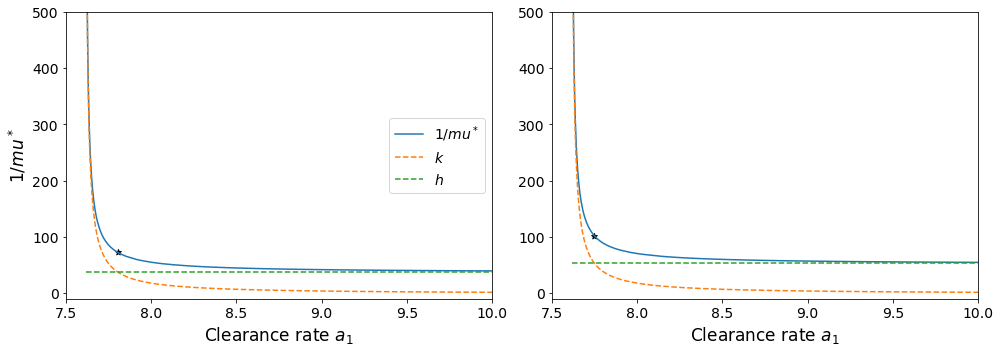

In [6]:
fig, ax = plt.subplots(1,2,figsize = (14,5))

for i in range(2):
    ax[i].plot(a1_vals, 1/(mvals[0]*all_results_ustar[i]))
    a1_heqk = np.searchsorted(all_results_h[i]-all_results_k[i],0)
    ax[i].plot(a1_vals, all_results_k[i], linestyle = 'dashed')
    ax[i].plot(a1_vals, all_results_h[i], linestyle = 'dashed')
    ax[i].scatter([a1_vals[a1_heqk]], [all_results_h[i][a1_heqk]/0.52138], marker = '*', c='k')
    ax[i].tick_params(labelsize = 14)
    ax[i].set_xlabel('Clearance rate $a_1$', fontsize = 17)
    ax[0].set_ylabel('$1/mu^*$', fontsize = 17)
    ax[0].legend(['$1/mu^*$', '$k$', '$h$'], fontsize = 14, loc = 'center right')

    ax[i].set_ylim(-10,500)
    ax[i].set_xlim(7.5,10)
    
plt.tight_layout()
plt.savefig('figure_Ffunction_k_h_FEB8.jpg', dpi = 500, bbox_inches = 'tight')